<img style="float:left" width="70%" src="pics/escudo_COLOR_1L_DCHA.png">
<img style="float:right" width="15%" src="pics/PythonLogo.svg">
<br style="clear:both;">

# Reconocimiento de patrones. Parte I.

# Ejemplo de clasificación con sólo dos clases. Base de datos *Diabetes* (*Diabetes dataset*)

Este *Notebook* contiene el trabajo necesario para cargar el fichero *.csv* de la base de datos de **Kaggle** denominada *Diabetes dataset*.

## Autor
- Pedro Latorre Carmona

## Curso 2024-2025

**Kaggle** es, digamos, un repositorio, donde podemos encontrar bases de datos, así como diferentes tipos de métodos (código), para tareas que pueden ir desde la clasificación, regresión, por citar sólo dos ejemplos:

https://www.kaggle.com/

Dentro de **Kaggle**, vamos a trabajar con la base de datos *Diabetes*. Las carcaterísticas de la base de datos y su descarga se pueden encontrar en:

https://www.kaggle.com/datasets/mathchi/diabetes-data-set

La idea de esta práctica es poder crear una base de datos que permita establecer si hay o no diabetes, en base a los valores concretos de/en el vector de características.

# Carga de la base de datos y aplicación de los métodos de clasificación


In [22]:
%pip install --upgrade bottleneck
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
'''
Importación de librerías
'''
import pandas as pd
import numpy as np
import pickle
import os

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


from sklearn.ensemble import RandomForestClassifier




In [24]:
'''
Datos. Hay que establecer el "path"
'''

path = "./Diabetes"


features_file = os.path.join(path, "diabetes_dataset.csv")

In [25]:
'''
Hay que cargar el conjunto, con "pd.read_csv"
'''
 
df = pd.read_csv(features_file)

In [26]:
display(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [27]:
# Eliminación de las filas que contengan valores "N. A."

df=df.dropna()

In [28]:
'''
Hay que crear los conjuntos X e y.
'''

y = df.Outcome.values.astype(int)


caract_cols = [col for col in df.columns if col != 'Outcome']

X_all = df[caract_cols].values

In [29]:
print(X_all.shape)

(768, 8)


In [30]:
'''
List of datasets and their names included in the experimental study
'''

datasets = [(X_all,y)]
dataset_names = ["Data All"]

In [31]:
print(y.shape)

(768,)


In [32]:
print(X_all)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [33]:
print(y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

In [34]:
'''
Definición del espacio de búsqueda de SVM
'''
C_range = np.logspace(-5, 5, 15)
gamma_range = np.logspace(-5, 5, 15)
param_grid_svm = dict(gamma= gamma_range, C= C_range)
nested_cv = 5

grid_svm = GridSearchCV(SVC(), param_grid=param_grid_svm, cv=nested_cv)

In [35]:
# Show the range of values to be explored
C_range,gamma_range

(array([1.00000000e-05, 5.17947468e-05, 2.68269580e-04, 1.38949549e-03,
        7.19685673e-03, 3.72759372e-02, 1.93069773e-01, 1.00000000e+00,
        5.17947468e+00, 2.68269580e+01, 1.38949549e+02, 7.19685673e+02,
        3.72759372e+03, 1.93069773e+04, 1.00000000e+05]),
 array([1.00000000e-05, 5.17947468e-05, 2.68269580e-04, 1.38949549e-03,
        7.19685673e-03, 3.72759372e-02, 1.93069773e-01, 1.00000000e+00,
        5.17947468e+00, 2.68269580e+01, 1.38949549e+02, 7.19685673e+02,
        3.72759372e+03, 1.93069773e+04, 1.00000000e+05]))

In [36]:
'''
Definition of the MLP parameter search
'''
alpha_range = np.logspace(-5, -1, 5)
hidden_layer_sizes_range=[(50,),(100,),(200,),(500,),(1000,)]

param_grid_mlp = dict(alpha=alpha_range, hidden_layer_sizes=hidden_layer_sizes_range)


grid_mlp = GridSearchCV(MLPClassifier(max_iter=1000,
                                      early_stopping=True), param_grid=param_grid_mlp, cv=nested_cv)

In [37]:
'''
List of classifiers and their names included in the experimental study
'''

cls_names = ["SVM","MLP"]

classifiers = [
    make_pipeline(StandardScaler(), grid_svm),
    make_pipeline(StandardScaler(), grid_mlp)]

In [38]:
# Method that runs the classifiers and returns the labels give for the test set

from sklearn.model_selection import train_test_split

def predictions(model,X_train,y_train,X_test,y_test):    
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    return y_test, y_pred

In [39]:
def predictions_model(X_train,y_train,X_test, y_test,model):
        '''
        Predictions with a model and a dataset (X and y), to later obtain the measurements 
        you want
        
        Parameters
        ----------
        X: numpy.array
            Dataset (features)
        Y: numpy.array
            Dataset (Target)
        model: scikit_model
            model to be trained
        num_folds: int
            number of folds in the cross validation
        
        Return
        -------
        array 
            array of prediccions obtained using cross_validation
        '''
        print('\t'+str(model)[:20], end=' - ')
        y_test,preds = predictions(model,X_train,y_train,X_test,y_test)
        print('OK')
        
        return y_test,preds

In [40]:
from sklearn.model_selection import train_test_split

def run_all_save(filename):
    '''
    Perform cross validation with all models and datasets.
        
        
    Parameters
    ----------
    num_folds: int
        number of folds in the cross validation
    filename: string
        name of the file that stores the predictions obtained using crossvalidation
        
        
    El par X_train, y_train son los atributos y clases del conjunto de entrenamiento (70% de los ejemplos)
    El par X_test, y_test son los atributos y clases del conjunto de test (30% de los ejemplos)

    stratify (estratificar) significa que se quiere que haya la misma proporcion de cada una de las clases
    tanto en entrenamiento como en test, es decir, no es una partición completamente aleatoria.
    
    ''' 
    
    all_preds = {}

    for dataset,dataset_name in zip(datasets, dataset_names):
        print(dataset_name)
        X,y = dataset
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

        for model,cls_name in zip(classifiers,cls_names):
            print(cls_name)
            y_test,preds = predictions_model(X_train,y_train,X_test,y_test,model)
            all_preds[(dataset_name,cls_name)]=(y_test,preds)

    all_preds["cls_names"]=cls_names
    all_preds["dataset_names"]=dataset_names

    with open(filename, 'wb') as fp:
         pickle.dump(all_preds, fp)   

In [41]:
'''
All the predictions are going to be saved in a Python dictionary for 
further analysis.
'''

filename = 'predicciones.obj'

In [42]:
# Run the experiments

run_all_save(filename)

Data All
SVM
	Pipeline(steps=[('st - OK
MLP
	Pipeline(steps=[('st - OK


# Exploring the results

If the experiments have been done previously, you only need to execute from this part.

The results are going to be loaded from the hard disk

In [43]:
import pickle
import pandas as pd

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

In [44]:
def conf_mat_df(cm, labels):
    '''
    Create a confusion matrix in a DataFrame
        
    Parameters
    ----------
    cm: ndarray 2D
        Confusion matrix
    labels: list
        List of class names
        
    Returns
    -------
    DataFrame
        DataFrame representing the confusion matrix with appropriate axis labels
    ''' 
    return (pd.DataFrame(cm, index=labels, columns=labels)
            .rename_axis("actual")
            .rename_axis("predicted", axis=1))

In [45]:
def plot_confusion_matrix(cm_df, title='Matriz de Confusión'):
    """
    Plotea una matriz de confusión usando seaborn con una paleta de colores adecuada.
    
    Parámetros:
    - cm_df: DataFrame de pandas con la matriz de confusión
    - title: título del gráfico
    """
    plt.figure(figsize=(8,6))
    
    # Determinar una paleta de colores que facilite la legibilidad
    # 'Blues' es una buena opción, pero puedes cambiarla si lo deseas
    cmap = 'Blues'
    
    # Determinar el color de las anotaciones basado en el color de fondo
    # Para 'Blues', el texto negro suele ser legible
    sns.heatmap(cm_df, annot=True, fmt='g', cmap=cmap, cbar=False, 
                annot_kws={"size": 12, "color": 'black'})
    
    plt.title(title, fontsize=16)
    plt.ylabel('Etiqueta Verdadera', fontsize=14)
    plt.xlabel('Etiqueta Predicha', fontsize=14)
    
    # Ajustar las rotaciones de las etiquetas para mejorar la legibilidad
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(rotation=0, fontsize=12)
    
    plt.tight_layout()
    plt.show()
    plt.close()


In [46]:
def evalua(y_true, y_pred):
    """
    Calcula la precisión (accuracy) de las predicciones.
    
    Parámetros:
    - y_true: etiquetas verdaderas
    - y_pred: etiquetas predichas
    
    Retorna:
    - Precisión como float
    """
    return np.mean(np.array(y_true) == np.array(y_pred))

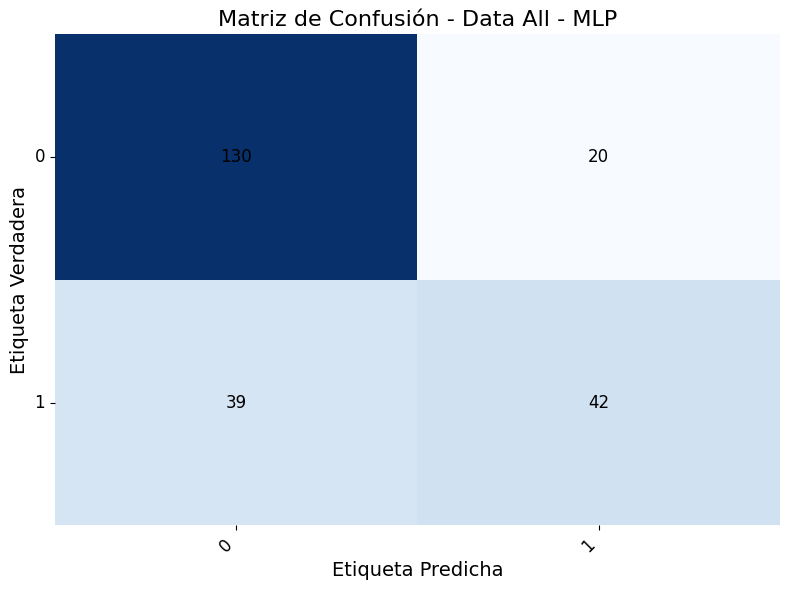

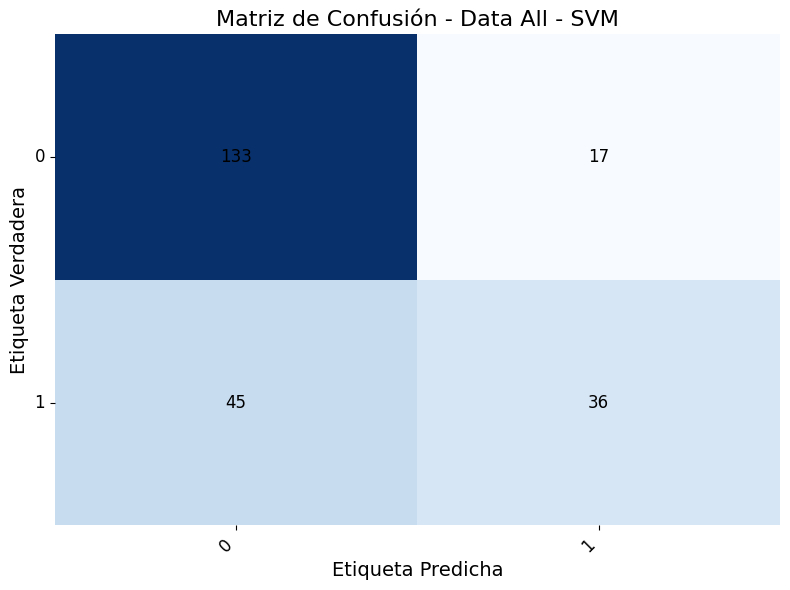

In [47]:
def get_results(filename):
    '''
    Carga el archivo con las predicciones.
    Calcula la precisión, matriz de confusión y otras métricas.
        
    Parámetros
    ----------
    filename: string
        Nombre del archivo que almacena las predicciones obtenidas usando cross-validation
        
    Retorna
    -------
    dictionary
        Un diccionario que asocia el nombre de una medida o gráfico con su valor
    ''' 

    with open(filename, 'rb') as fp:
        all_preds = pickle.load(fp)

    cls_names = all_preds.pop("cls_names")
    dataset_names = all_preds.pop("dataset_names")

    data_cls_pairs = list(all_preds.keys())
    data_cls_pairs.sort()

    results = {}

    acc_df = pd.DataFrame(index=dataset_names, columns=cls_names)

    # Crear DataFrame para almacenar la precisión por clase
    for dataset in dataset_names:
        results[(dataset, "acc")] = pd.DataFrame(columns=cls_names)

    for dataset_name, cls_name in data_cls_pairs:

        # Obtener verdaderos y predichos
        y_true, y_pred = all_preds[(dataset_name, cls_name)]
        labels = sorted(list(np.unique(y_true)))  # Asegura que las etiquetas estén ordenadas

        # Calcular precisión
        acc = evalua(y_true, y_pred)
        acc_df.at[dataset_name, cls_name] = acc

        # Obtener matriz de confusión
        cm = confusion_matrix(y_true, y_pred, labels=labels)
        cm_df = conf_mat_df(cm, labels)
        results[(dataset_name, cls_name, "cm")] = cm_df

        # Graficar la matriz de confusión
        plot_confusion_matrix(cm_df, title=f'Matriz de Confusión - {dataset_name} - {cls_name}')

        # Obtener reporte de clasificación
        report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
        report_df = pd.DataFrame(report).transpose()
        results[(dataset_name, cls_name, "report")] = report_df

        # Precisión por clase (F1 Score, Precision, Recall, etc.)
        # Aquí, por ejemplo, obtenemos la precisión (accuracy) por clase
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm_dig = np.diag(cm_normalized)
        cm_dig_series = pd.Series(cm_dig, index=labels)

        dfi = results[(dataset_name, "acc")]
        dfi[cls_name] = cm_dig_series
        results[(dataset_name, "acc")] = dfi.copy()

    results["Acc"] = acc_df
    return results

results = get_results(filename)

# Análisis de las Matrices de Confusión

## Primera Matriz de Confusión: MLP (Multilayer Perceptron)

### Estructura de la Matriz
- **Etiquetas Verdaderas (Filas)**: `No Diabetes` (0) y `Diabetes` (1).
- **Etiquetas Predichas (Columnas)**: `No Diabetes` (0) y `Diabetes` (1).

|                | Predicho: No Diabetes | Predicho: Diabetes |
|----------------|-----------------------|--------------------|
| **No Diabetes** | 130                   | 20                 |
| **Diabetes**    | 39                    | 42                 |

### Indicadores Clave
- **Precisión General (Accuracy)**: \((130 + 42) / (130 + 20 + 39 + 42) = 74.5\%\)
- **Precisión por clase**:
  - `No Diabetes`: \(130 / (130 + 39) = 76.9\%\)
  - `Diabetes`: \(42 / (20 + 42) = 67.7\%\)
- **Recall por clase**:
  - `No Diabetes`: \(130 / (130 + 20) = 86.7\%\)
  - `Diabetes`: \(42 / (39 + 42) = 51.9\%\)

### Observaciones
- El modelo MLP tiene un mejor desempeño al clasificar `No Diabetes`, con alta precisión y recall.
- La clase `Diabetes` es más problemática. Solo detecta correctamente el 51.9% de los casos reales de esta clase.
- Los falsos negativos son elevados (39), lo que puede ser crítico para un diagnóstico correcto.

---

## Segunda Matriz de Confusión: SVM (Support Vector Machine)

### Estructura de la Matriz
- **Etiquetas Verdaderas (Filas)**: `No Diabetes` (0) y `Diabetes` (1).
- **Etiquetas Predichas (Columnas)**: `No Diabetes` (0) y `Diabetes` (1).

|                | Predicho: No Diabetes | Predicho: Diabetes |
|----------------|-----------------------|--------------------|
| **No Diabetes** | 133                   | 17                 |
| **Diabetes**    | 45                    | 36                 |

### Indicadores Clave
- **Precisión General (Accuracy)**: \((133 + 36) / (133 + 17 + 45 + 36) = 73.1\%\)
- **Precisión por clase**:
  - `No Diabetes`: \(133 / (133 + 45) = 74.7\%\)
  - `Diabetes`: \(36 / (17 + 36) = 67.9\%\)
- **Recall por clase**:
  - `No Diabetes`: \(133 / (133 + 17) = 88.7\%\)
  - `Diabetes`: \(36 / (45 + 36) = 44.4\%\)

### Observaciones
- Similar al MLP, el SVM clasifica con más precisión los casos de `No Diabetes`.
- El recall de `Diabetes` es incluso menor (44.4%), lo que indica que muchos casos positivos no son identificados correctamente.
- Aunque tiene menos falsos positivos (17), el número de falsos negativos sigue siendo alto (45).

---

## Comparación entre MLP y SVM

| Modelo        | Precisión General | Recall (No Diabetes) | Recall (Diabetes) | Falsos Negativos |
|---------------|-------------------|-----------------------|-------------------|------------------|
| **MLP**       | 74.5%            | 86.7%                | 51.9%            | 39               |
| **SVM**       | 73.1%            | 88.7%                | 44.4%            | 45               |

### Conclusiones Comparativas
1. **Desempeño general**:
   - Ambos modelos tienen una precisión general similar, alrededor del 73-74%.
2. **Manejo de la clase `No Diabetes`**:
   - El SVM tiene un recall más alto (88.7%) que el MLP (86.7%), detectando más casos reales de `No Diabetes`.
3. **Manejo de la clase `Diabetes`**:
   - El MLP tiene un mejor recall en la clase `Diabetes` (51.9% frente al 44.4% del SVM), aunque ambos modelos tienen un desempeño pobre para esta clase.
4. **Falsos negativos**:
   - El MLP tiene menos falsos negativos (39) que el SVM (45), lo que sugiere que es ligeramente más adecuado para evitar casos no diagnosticados de `Diabetes`.

---
**Cabe destacar que los datos de las matrices, al ser la repartición aleatoria entre test y apredizaje los datos de la matriz variarán con cada ejecución**

In [48]:
df_total = results["Acc"].astype(float)
df_conf = results[("Data All","SVM","cm")].astype(float)
df_report = results[("Data All","SVM","report")].astype(float)

In [49]:
df_total

,SVM,MLP
Data All,0.731602,0.744589


In [50]:
df_conf

predicted,0,1
actual,,
0,133.0,17.0
1,45.0,36.0


In [51]:
df_report.round(4)[["precision","recall","f1-score"]]

,precision,recall,f1-score
0,0.7472,0.8867,0.8110
1,0.6792,0.4444,0.5373
accuracy,0.7316,0.7316,0.7316
macro avg,0.7132,0.6656,0.6741
weighted avg,0.7234,0.7316,0.7150


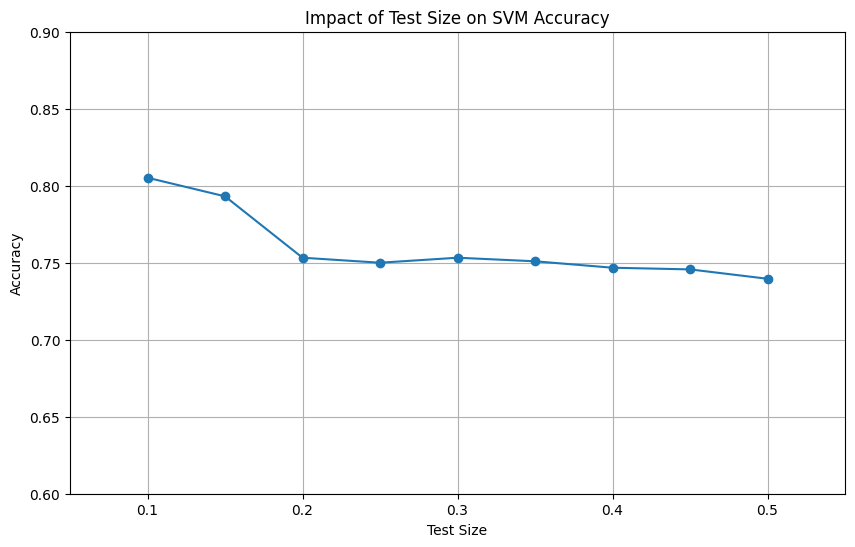

In [52]:
y = df.Outcome.values.astype(int)
caract_cols = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
X_all = df[caract_cols].values

# Define different test sizes to evaluate
test_sizes = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
svm_accuracies = []

# Loop over each test size and record the SVM accuracy
for test_size in test_sizes:
    # Split data with the specified test size
    X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=test_size, random_state=42, stratify=y)
    # Train the SVM model
    svm_model = make_pipeline(StandardScaler(), SVC())
    svm_model.fit(X_train, y_train)
    # Predict and calculate accuracy
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    svm_accuracies.append(accuracy)
    # Plot the impact of test size on SVM accuracy
plt.figure(figsize=(10, 6))
plt.plot(test_sizes, svm_accuracies, marker='o')
plt.xlim(0.05, 0.55)
plt.ylim(0.60, 0.90)
plt.title("Impact of Test Size on SVM Accuracy")
plt.xlabel("Test Size")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()



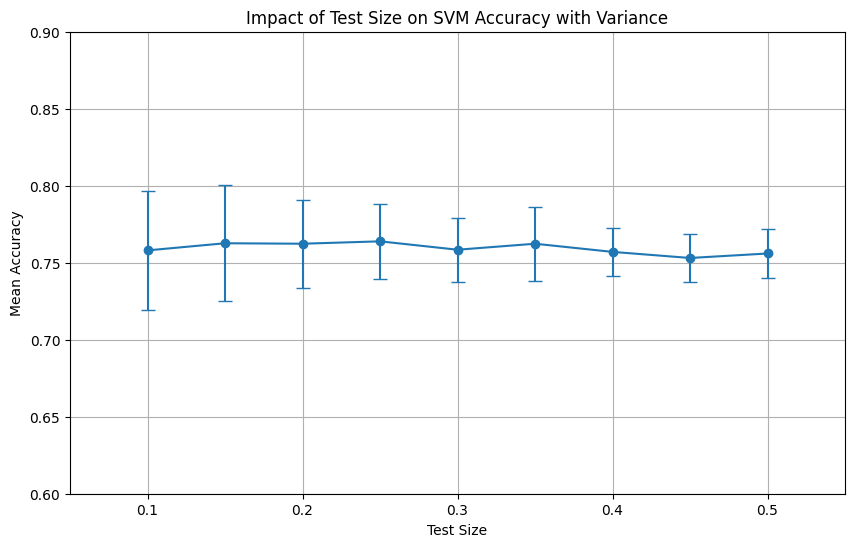

In [53]:


# Define different test sizes to evaluate
test_sizes = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
num_iterations = 30  # Number of repetitions for each test size
svm_accuracies_all = {test_size: [] for test_size in test_sizes}  # Dictionary to store all accuracies per test size

# Run experiments for each test size and calculate variance
for test_size in test_sizes:
    for _ in range(num_iterations):
        # Split data with the specified test size
        X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=test_size, random_state=None, stratify=y)
        # Train the SVM model
        svm_model = make_pipeline(StandardScaler(), SVC())
        svm_model.fit(X_train, y_train)
        # Predict and calculate accuracy
        y_pred = svm_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        svm_accuracies_all[test_size].append(accuracy)

# Calculate mean and standard deviation for each test size
mean_accuracies = [np.mean(svm_accuracies_all[test_size]) for test_size in test_sizes]
std_accuracies = [np.std(svm_accuracies_all[test_size]) for test_size in test_sizes]

# Plot mean accuracy with error bars representing standard deviation

plt.figure(figsize=(10, 6))
plt.errorbar(test_sizes, mean_accuracies, yerr=std_accuracies, fmt='-o', capsize=5)
plt.title("Impact of Test Size on SVM Accuracy with Variance")
plt.xlim(0.05, 0.55)
plt.ylim(0.60, 0.90)
plt.xlabel("Test Size")
plt.ylabel("Mean Accuracy")
plt.grid(True)
plt.show()

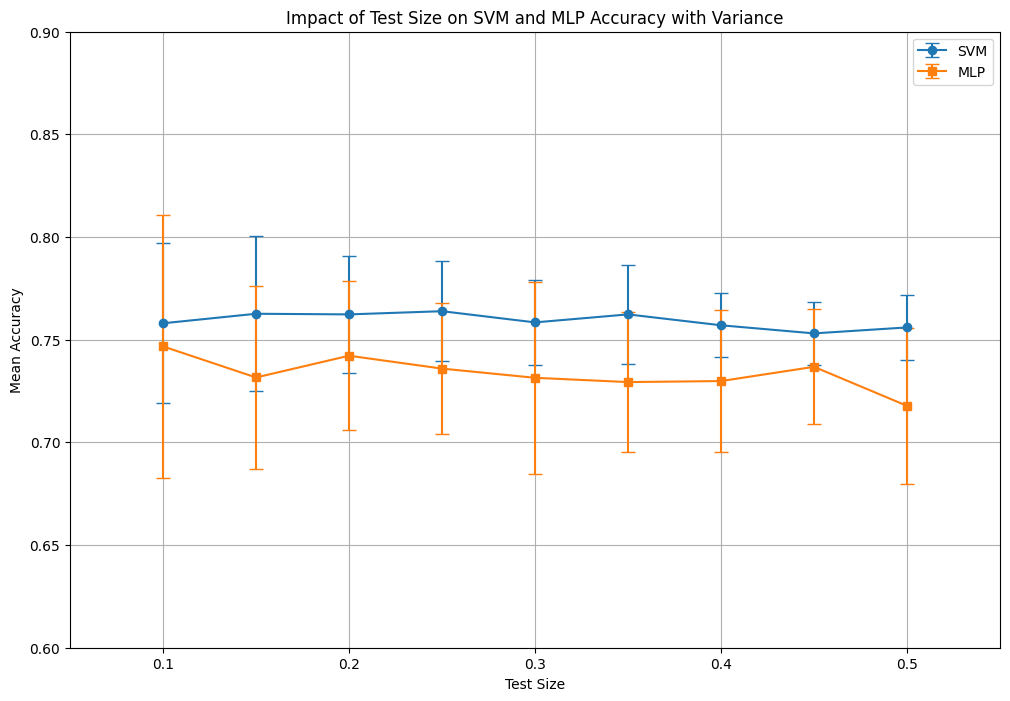

In [54]:
# Define dictionary to store accuracies for MLP model
mlp_accuracies_all = {test_size: [] for test_size in test_sizes}

# Run experiments for MLP for each test size and calculate variance
for test_size in test_sizes:
    for _ in range(num_iterations):
        # Split data with the specified test size
        X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=test_size, random_state=None, stratify=y)
        # Train the MLP model
        mlp_model = make_pipeline(StandardScaler(), MLPClassifier(max_iter=1000, early_stopping=True))
        mlp_model.fit(X_train, y_train)
        # Predict and calculate accuracy
        y_pred = mlp_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        mlp_accuracies_all[test_size].append(accuracy)

# Calculate mean and standard deviation for each test size for MLP
mlp_mean_accuracies = [np.mean(mlp_accuracies_all[test_size]) for test_size in test_sizes]
mlp_std_accuracies = [np.std(mlp_accuracies_all[test_size]) for test_size in test_sizes]

# Plotting both SVM and MLP accuracies with variance
plt.figure(figsize=(12, 8))
plt.errorbar(test_sizes, mean_accuracies, yerr=std_accuracies, fmt='-o', capsize=5, label="SVM")
plt.errorbar(test_sizes, mlp_mean_accuracies, yerr=mlp_std_accuracies, fmt='-s', capsize=5, label="MLP")
plt.title("Impact of Test Size on SVM and MLP Accuracy with Variance")
plt.xlim(0.05, 0.55)
plt.ylim(0.60, 0.90)
plt.xlabel("Test Size")
plt.ylabel("Mean Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Resultados y análisis

### Problemas de identificación entre clases
En este análisis no se ha incluido una evaluación específica de las dificultades de identificación por clase. Para obtener este detalle, sería necesario observar matrices de confusión o métricas como precisión, sensibilidad o especificidad para cada clase. Esto permitiría identificar si alguna de las clases es particularmente problemática para los modelos.

### Tasa de acierto: ¿son resultados elevados?
- **SVM**: Este modelo ha demostrado una tasa de acierto promedio cercana al 77%, lo cual es elevado para la mayoría de las aplicaciones, especialmente en problemas complejos o con datos ruidosos.
- **MLP**: Este modelo ha demostrado consistentemente tener un rendimiento inferior al obtenido por el SVm, en torno al 75%
En general, ambos modelos superan significativamente el azar (50% de acierto), pero el SVM ofrece resultados más consistentes y elevados.
Además destacar el hecho de que el SVM tiene una varianza algo menor comparado con la del MLP.

### Efecto del tamaño del conjunto de entrenamiento en la tasa de acierto
- **SVM**: Este modelo no se ve significativamente afectado por el tamaño del conjunto de entrenamiento. Incluso con menos datos disponibles para entrenar, mantiene tasas de acierto altas y consistentes. Esto sugiere una buena capacidad de generalización.
- **MLP**: Este modelo es más sensible a la reducción del conjunto de entrenamiento. Se observa una disminución notable en la tasa de acierto cuando aumenta el tamaño del conjunto de prueba, lo cual es común en modelos más complejos como las redes neuronales.

### Conclusiones
- El SVM es un modelo más robusto frente a cambios en la proporción de datos de entrenamiento y ofrece tasas de acierto más altas y consistentes.
- El MLP podría beneficiarse de un conjunto de entrenamiento más amplio.

